In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data (adjust path as needed)
df = pd.read_csv('/Users/shivi/Downloads/US_Accidents_March23_sampled_500k.csv')
df[:5]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [13]:
print("--- Data Overview ---")
print(df.info())  # Columns, types, missing values
print("\n--- Missing Values by Column ---")
print(df.isnull().sum())

# Check date/time parsing and duplicates
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
duplicates = df.duplicated().sum()
print(f"\n--- Duplicates in Dataset: {duplicates}")

--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     500000 non-null  object        
 1   Source                 500000 non-null  object        
 2   Severity               500000 non-null  int64         
 3   Start_Time             451837 non-null  datetime64[ns]
 4   End_Time               451837 non-null  datetime64[ns]
 5   Start_Lat              500000 non-null  float64       
 6   Start_Lng              500000 non-null  float64       
 7   End_Lat                279623 non-null  float64       
 8   End_Lng                279623 non-null  float64       
 9   Distance(mi)           500000 non-null  float64       
 10  Description            499999 non-null  object        
 11  Street                 499309 non-null  object        
 12  City                  

In [5]:
df['hour'] = df['Start_Time'].dt.hour
df['dayofweek'] = df['Start_Time'].dt.day_name()
df['date'] = df['Start_Time'].dt.date
df['month'] = df['Start_Time'].dt.month
df['year'] = df['Start_Time'].dt.year

# Helper: Assign season
def get_season(date):
    Y = 2000  # dummy year for comparison
    seasons = {'Winter': ((datetime(Y, 1, 1), datetime(Y, 3, 20)),
                          (datetime(Y, 12, 21), datetime(Y, 12, 31))),
               'Spring': ((datetime(Y, 3, 21), datetime(Y, 6, 20)),),
               'Summer': ((datetime(Y, 6, 21), datetime(Y, 9, 22)),),
               'Fall':   ((datetime(Y, 9, 23), datetime(Y, 12, 20)),)}
    date = date.replace(year=Y)
    for season, ranges in seasons.items():
        for start, end in ranges:
            if start <= date <= end:
                return season
    return 'Winter'  # for dates on/after Dec 21

df['season'] = df['Start_Time'].apply(lambda d: get_season(d))

# Identify rush hours
def is_rush_hour(hour):
    return (6 <= hour <= 9) or (15 <= hour <= 18)
df['rush_hour'] = df['hour'].apply(is_rush_hour)

# Identify weekends
df['weekend'] = df['Start_Time'].dt.weekday > 4

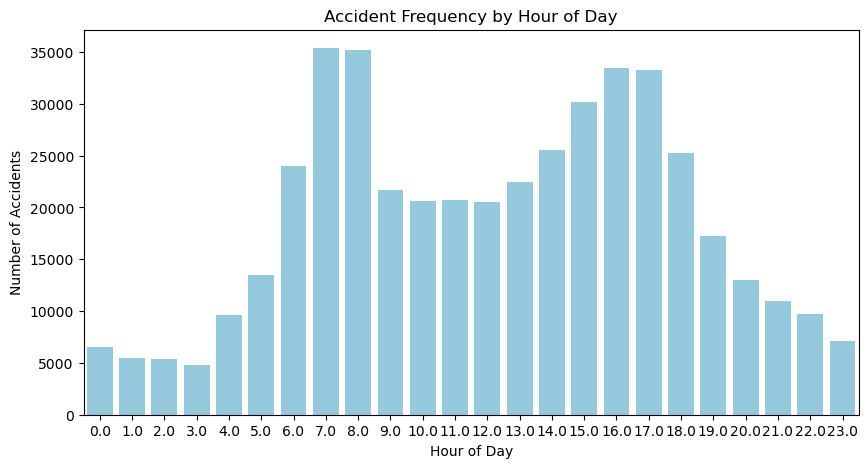

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, color='skyblue')
plt.title('Accident Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

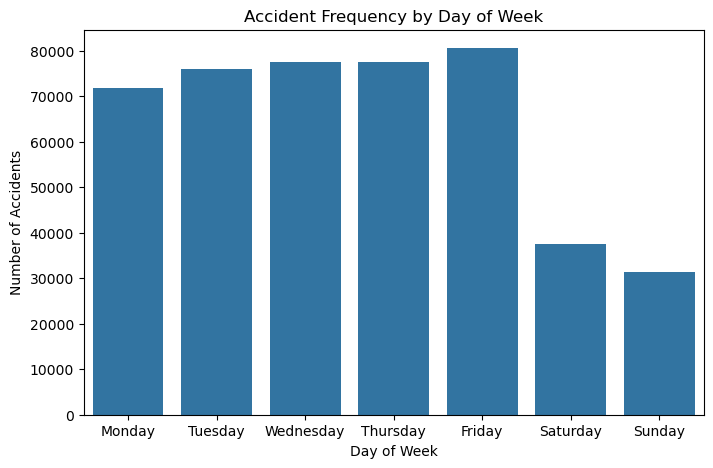

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='dayofweek', data=df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accident Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

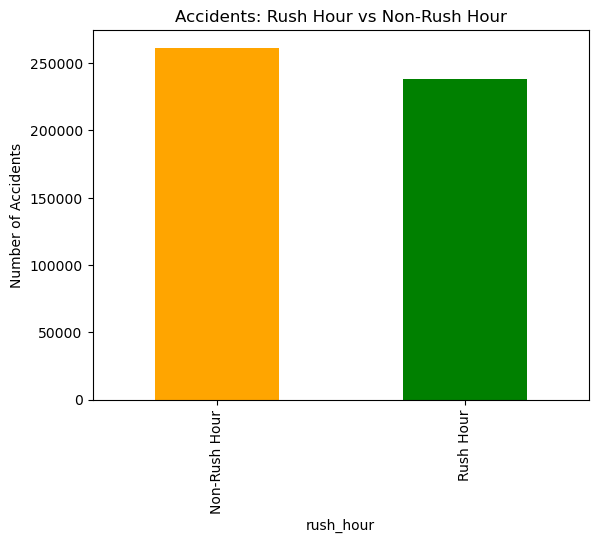

In [8]:
rush_hour_counts = df['rush_hour'].value_counts().rename({True:'Rush Hour', False:'Non-Rush Hour'})
rush_hour_counts.plot(kind='bar', color=['orange','green'])
plt.title('Accidents: Rush Hour vs Non-Rush Hour')
plt.ylabel('Number of Accidents')
plt.show()

/var/folders/5x/3kw0lrzj5mjdxgmklk4czpr40000gn/T/ipykernel_9489/3110919989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, order=['Winter','Spring','Summer','Fall'], palette='coolwarm')


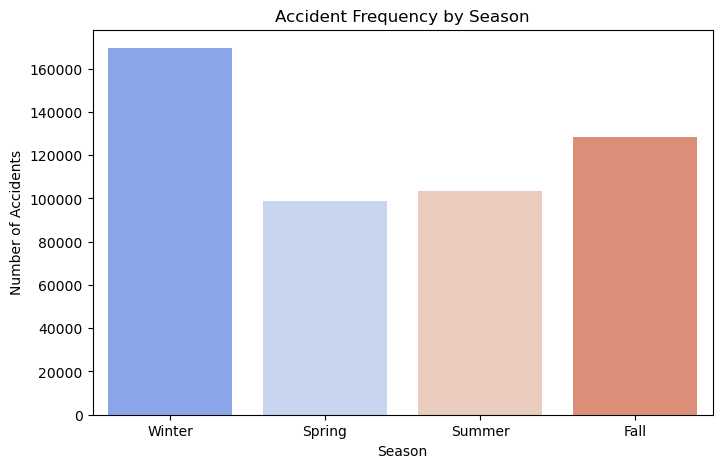

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='season', data=df, order=['Winter','Spring','Summer','Fall'], palette='coolwarm')
plt.title('Accident Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.show()


weekday_or_weekend
Weekday    383002
Weekend    116998
Name: count, dtype: int64


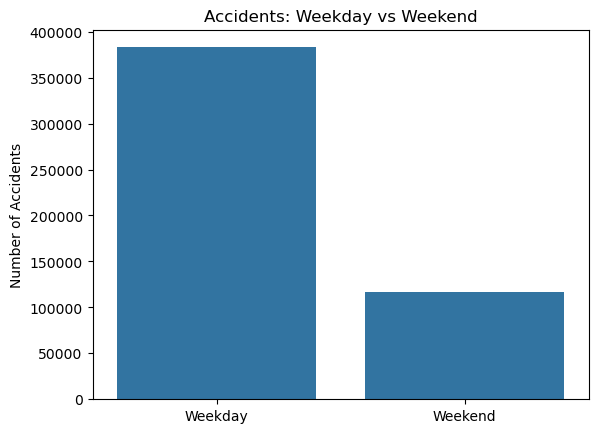

In [15]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Create 'weekday_or_weekend' column
df['weekday_or_weekend'] = df['Start_Time'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Quick check
print(df['weekday_or_weekend'].value_counts())

sns.countplot(x='weekday_or_weekend', data=df)
plt.title('Accidents: Weekday vs Weekend')
plt.xlabel('')
plt.ylabel('Number of Accidents')
plt.show()

In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 0: Load Data ---
df = pd.read_csv("/Users/shivi/Downloads/US_Accidents_March23_sampled_500k.csv")

# Drop rows with missing Start_Time - essential for temporal features
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df = df[~df['Start_Time'].isna()].copy()
print(f"Records after dropping missing Start_Time: {len(df)}")

# --- Step 1: Feature Engineering ---

# Hour of day
df['hour'] = df['Start_Time'].dt.hour

# Month of year
df['month'] = df['Start_Time'].dt.month

# Weekday (0=Mon,...6=Sun)
df['weekday'] = df['Start_Time'].dt.weekday

# Weekday vs Weekend
df['weekday_or_weekend'] = df['weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Season assignment function
def get_season(date):
    if pd.isnull(date):
        return np.nan
    Y = 2000
    d = date.replace(year=Y)
    if d >= datetime(Y, 12, 21) or d < datetime(Y, 3, 20):
        return 'Winter'
    elif datetime(Y, 3, 20) <= d < datetime(Y, 6, 21):
        return 'Spring'
    elif datetime(Y, 6, 21) <= d < datetime(Y, 9, 22):
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['Start_Time'].apply(get_season)

# --- Step 2: Boolean traffic/road features ---

boolean_features = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop'
]

for feature in boolean_features:
    df[feature] = df[feature].astype(int)

# --- Step 3: Encode categorical variables ---
df = pd.get_dummies(df, columns=['weekday_or_weekend', 'season'], drop_first=True)

# --- Step 4: Prepare features and target ---
feature_cols = ['hour', 'month'] + boolean_features + \
               [col for col in df.columns if col.startswith('weekday_or_weekend_') or col.startswith('season_')]

X = df[feature_cols]
y = df['Severity']  # Target: Severity (1-4)

# Drop any rows with missing values in features or target
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

print(f"Dataset size for modeling: {len(X)}")

# --- Step 5: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# --- Step 6: Train Random Forest ---
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# --- Step 7: Predictions ---
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# --- Step 8: Evaluation ---

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC AUC for multi-class (macro-average)
try:
    from sklearn.preprocessing import label_binarize
    y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
    roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
    print(f"Macro-average ROC AUC: {roc_auc:.3f}")
except Exception as e:
    print("ROC AUC calculation failed:", str(e))


Records after dropping missing Start_Time: 451837
Dataset size for modeling: 451837
Classification Report:

              precision    recall  f1-score   support

           1       0.11      0.00      0.01       855
           2       0.78      1.00      0.87     70250
           3       0.30      0.01      0.01     16903
           4       0.11      0.00      0.00      2360

    accuracy                           0.78     90368
   macro avg       0.32      0.25      0.23     90368
weighted avg       0.67      0.78      0.68     90368

Macro-average ROC AUC: 0.666


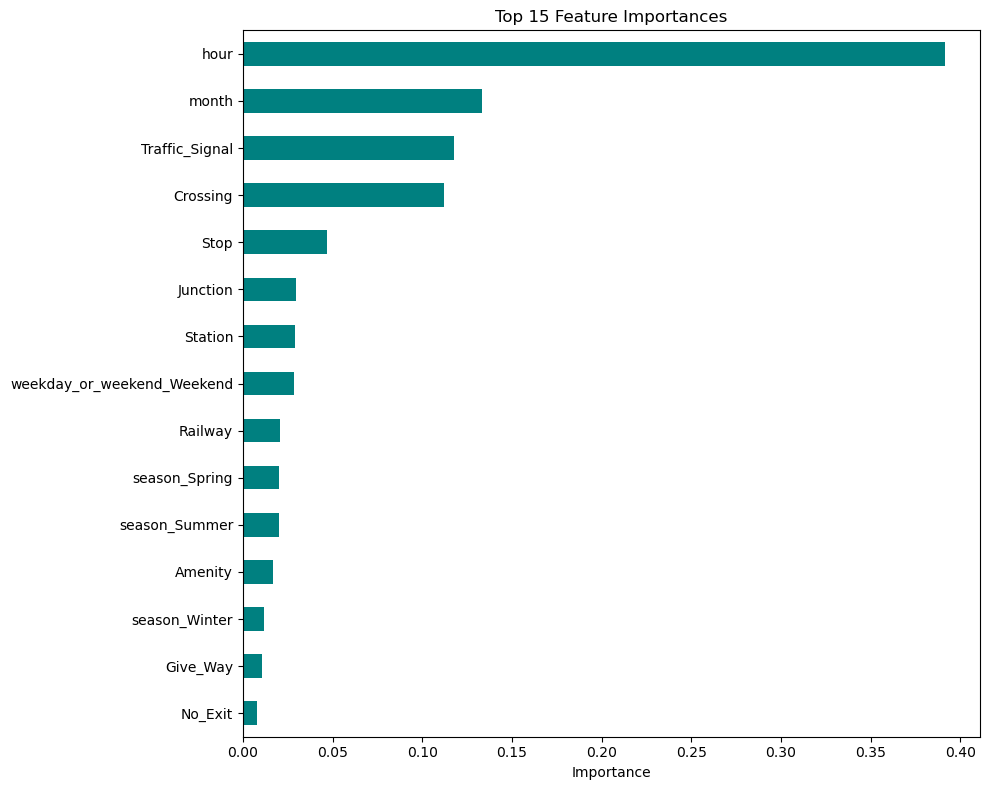

In [37]:
# --- Step 9: Feature importance ---
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=True)

plt.figure(figsize=(10,8))
importances.tail(15).plot(kind='barh', color='teal')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# --- Step 10: Visualizations ---

# # Severity distribution
# plt.figure(figsize=(6,4))
# sns.countplot(x='Severity', data=df)
# plt.title('Accident Severity Distribution')
# plt.show()

# # Severity by hour boxplot
# plt.figure(figsize=(12,6))
# sns.boxplot(x='hour', y='Severity', data=df)
# plt.title('Accident Severity by Hour of Day')
# plt.show()

# # Severity by season stacked bar plot
# plt.figure(figsize=(8,5))
# sns.countplot(x='season_Winter', hue='Severity', data=df)
# plt.title('Severity Distribution in "Winter" Season')
# plt.show()

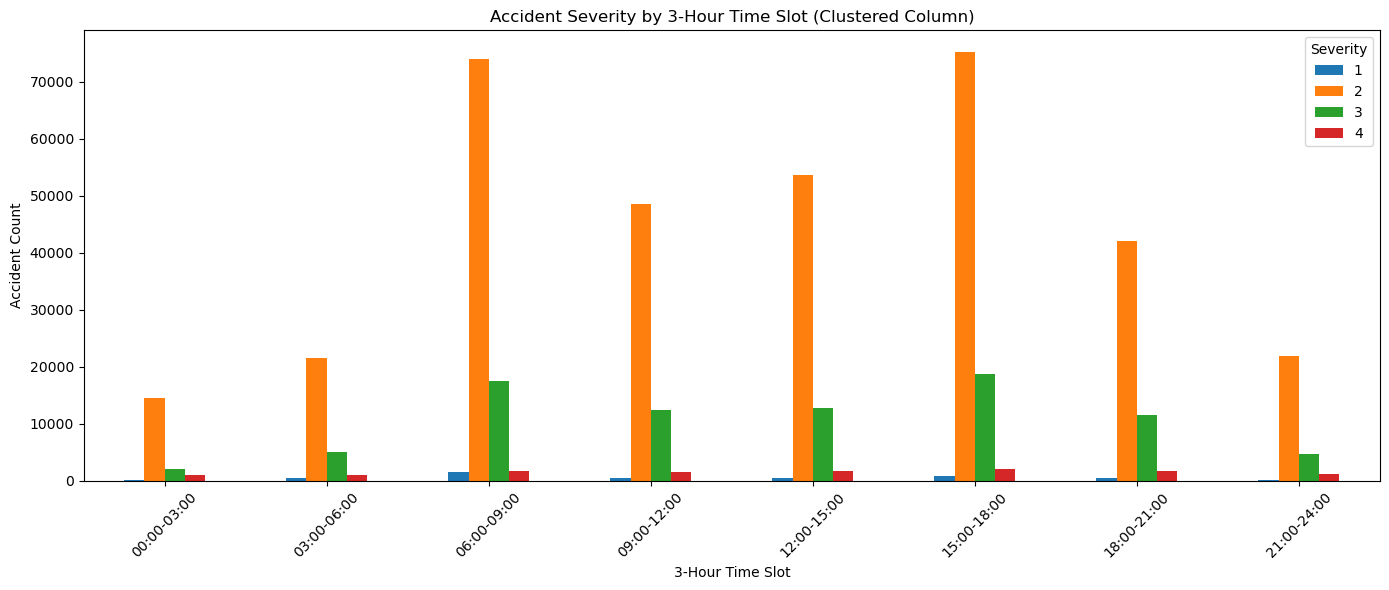

In [32]:
# Create 3-hour buckets
df['hour'] = df['Start_Time'].dt.hour
df['hour_bucket'] = (df['hour'] // 3) * 3
df['hour_bucket_label'] = df['hour_bucket'].astype(str).str.zfill(2) + ':00-' \
    + (df['hour_bucket'] + 3).astype(str).str.zfill(2) + ':00'

# Pivot data: rows = hour buckets, columns = severity classes
pivot = df.groupby(['hour_bucket_label', 'Severity']).size().unstack(fill_value=0)

# Sort buckets numerically
bucket_order = sorted(pivot.index, key=lambda b: int(b[:2]))
pivot = pivot.loc[bucket_order]

# Plot clustered column chart
pivot.plot(kind='bar', figsize=(14, 6))
plt.xlabel('3-Hour Time Slot')
plt.ylabel('Accident Count')
plt.title('Accident Severity by 3-Hour Time Slot (Clustered Column)')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


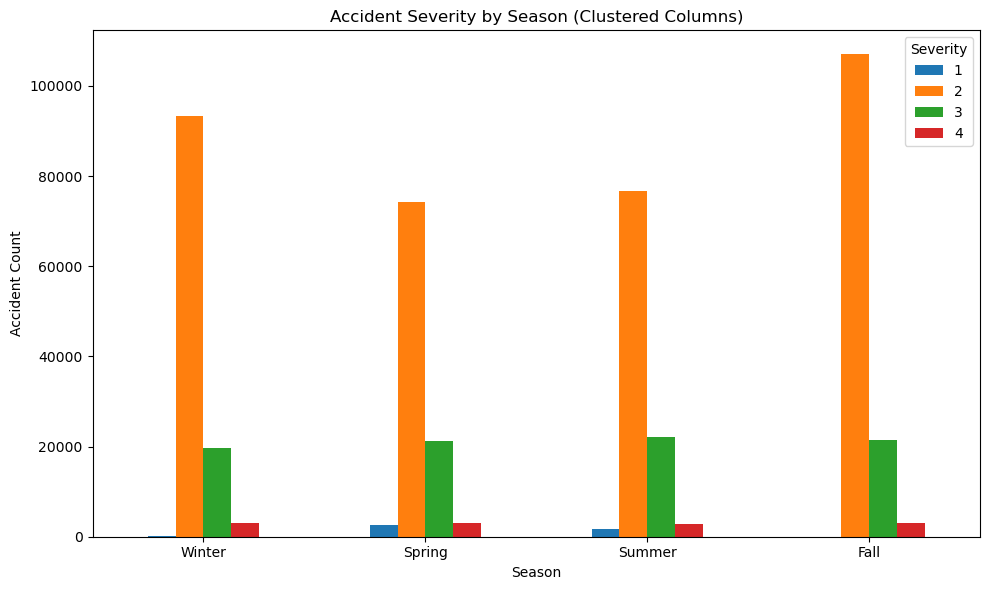

In [33]:


# Assign season function
def get_season(date):
    if pd.isnull(date): return None
    Y = 2000
    d = date.replace(year=Y)
    if d >= datetime(Y, 12, 21) or d < datetime(Y, 3, 20): return 'Winter'
    elif datetime(Y, 3, 20) <= d < datetime(Y, 6, 21): return 'Spring'
    elif datetime(Y, 6, 21) <= d < datetime(Y, 9, 22): return 'Summer'
    else: return 'Fall'
df['season'] = df['Start_Time'].apply(get_season)

# Prepare pivot table for clustered column (grouped bar)
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
pivot = df.groupby(['season', 'Severity']).size().unstack(fill_value=0)
pivot = pivot.reindex(season_order)

# Plot: Clustered columns for severity by season
pivot.plot(kind='bar', figsize=(10,6))
plt.xlabel('Season')
plt.ylabel('Accident Count')
plt.title('Accident Severity by Season (Clustered Columns)')
plt.xticks(rotation=0)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()
